# 넘파이와 다차원 배열

## 넘파이의 다차원 배열

In [4]:
import numpy as np

# array
x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [5]:
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print(W.ndim)
print(W.shape)

2
(2, 3)


## 원소별 연산

In [6]:
# element-wise operation
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print('---')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


## 벡터의 내적과 행렬 곱

In [8]:
# inner product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)  # a @ b
print(y)

32


In [9]:
# matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)  # A @ B
print(Y)

[[19 22]
 [43 50]]


# 다변량 정규 분포

- 전치

In [11]:
import numpy as np

# transpose
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)


[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


- 행렬식

In [12]:
# determinant
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


- 역행렬

In [13]:
# inverse matrix
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)
print(B)
print('---')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


In [17]:
print((A @ B).astype(int))

[[1 0]
 [0 1]]


## 다변량 정규 분포 구현

In [18]:
# multivariate normal distribution
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

0.013064233284684921


# 2차원 정규 분포 시각화

## 3D 그래프 그리기

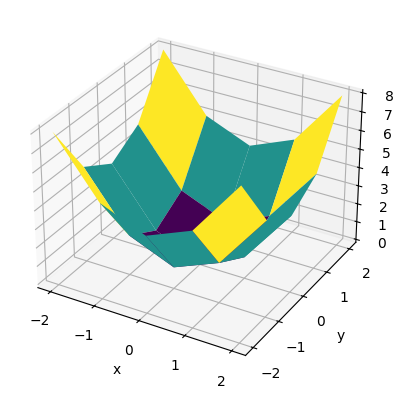

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


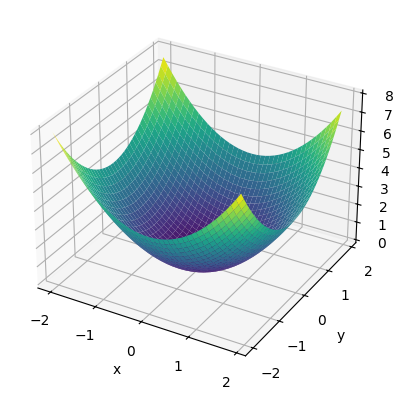

In [4]:
# ===== better resolution =====
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## 등고선 그리기

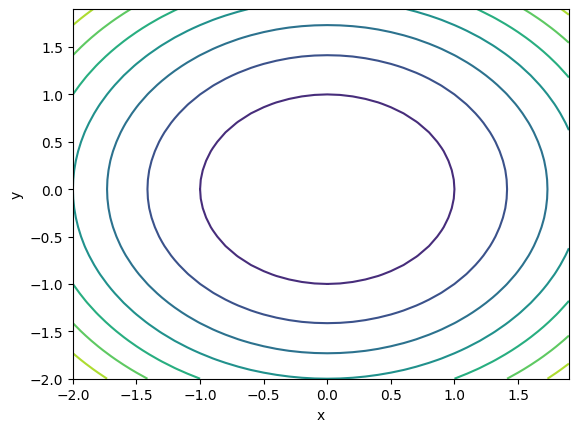

In [5]:
# ===== plot contour =====
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## 2차원 정규 분포 그래프

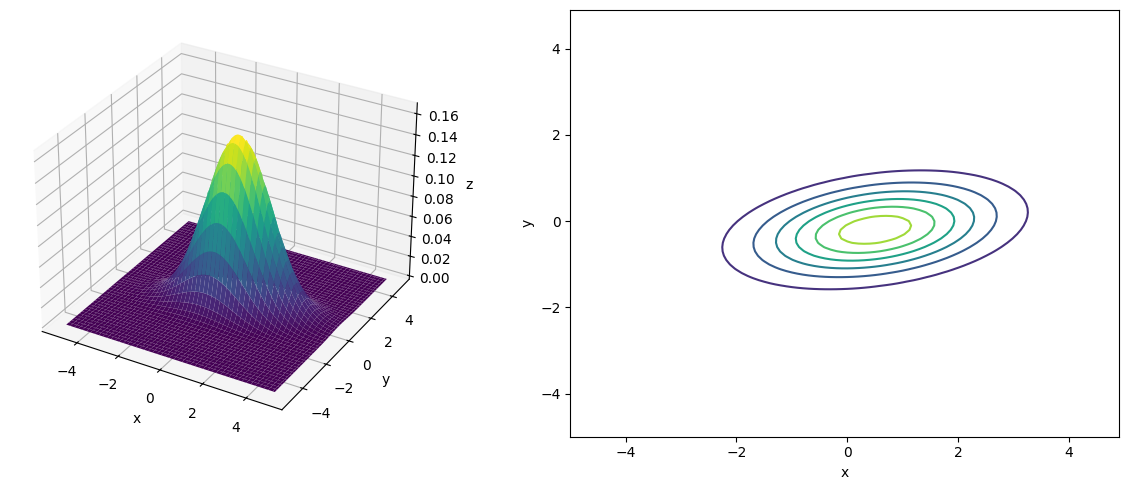

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

# figure 크기 조정 및 subplot 간격 설정
fig = plt.figure(figsize=(12, 5))  # 가로 크기를 12로 늘림
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.tight_layout(w_pad=3)  # subplot 사이 간격을 3으로 설정
plt.show()


# 다변량 정규 분포의 최대 가능도 추정

## 최대 가능도 추정 구현

In [13]:
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.randn(N, D)

mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False) # 각 열을 하나의 변수로 취급, 각 행을 하나의 데이터(샘플)로 취급

print(mu)
print(cov)

[-0.01048639  0.00304068]
[[0.98996234 0.00487768]
 [0.00487768 0.97200076]]


## 실제 데이터 사용

(25000, 2)


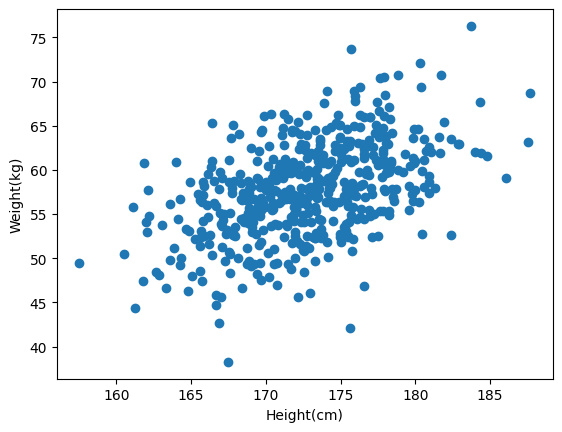

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

# path = os.path.join(os.path.dirname(__file__), './data/height_weight.txt')
# xs = np.loadtxt(path)
path = './data/height_weight.txt'  # 또는 전체 경로를 입력
xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

In [16]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

print(mu)
print(cov)

[172.70250854  57.6422088 ]
[[23.33145108 12.84736477]
 [12.84736477 27.97658708]]


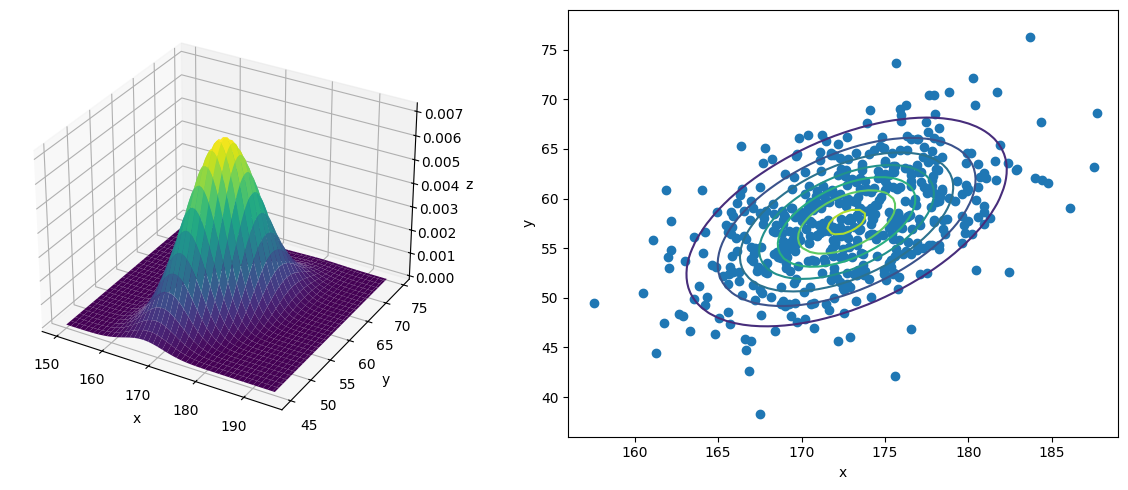

In [17]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 5))  # 가로 크기를 12로 늘림
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.tight_layout(w_pad=3)  # subplot 사이 간격을 3으로 설정
plt.show()